In [1]:
%matplotlib inline

import numpy as np
from numpy import linalg as nla
import scipy as sp
from scipy import linalg as sla
import SHFunctions as shf
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pprint import pprint
from time import time
import os

from jupyterthemes import jtplot
jtplot.style(theme='solarizedl')

from IPython.core.display import display, HTML
np.set_printoptions(linewidth = 270)

In [2]:
# A, S = shf.MakeOneSingA(5, 8, delta = .00000)
# S = np.real(S)
delt = .00000
m = 10
A = shf.MakeSingularA(m, 2, delta = delt)

# A = np.load('200121_Coefficients.npy')

# $S$의 spectral radius 확인
- 목적 : cyclic reduction 적용 가능 여부 확인
- 웬만하면 안 되는 방향으로 ㅋㅋㅋㅋㅋㅋ

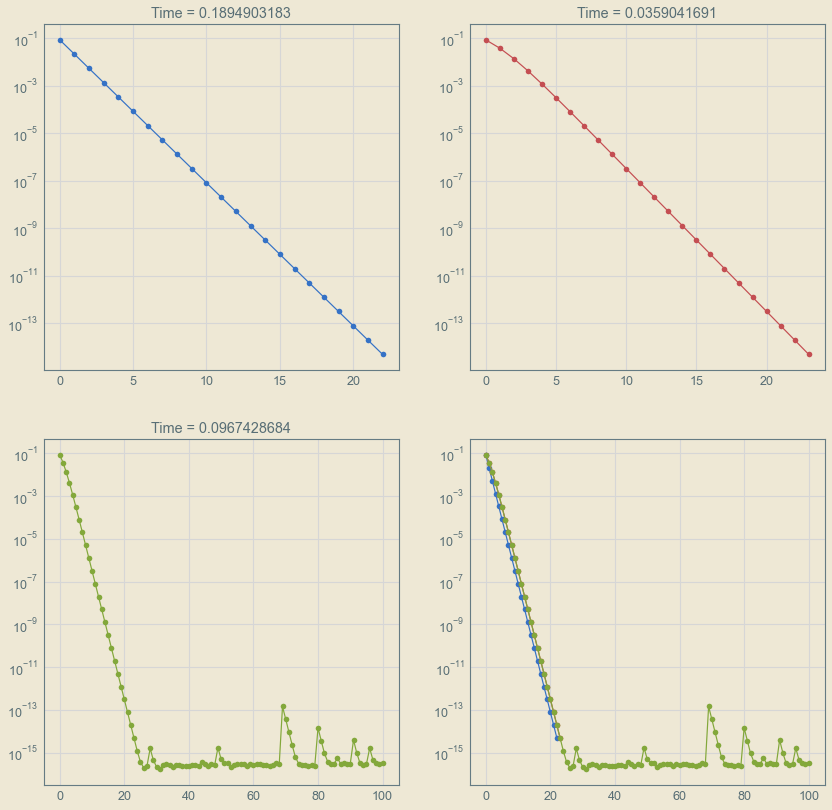

In [3]:
Ss = shf.NewtonPoly(A, X0 = -nla.solve(A[1], A[0]))
S2 = shf.CRPoly(A)
# S3 = shf.BrunoCRPoly(A)
S3 = shf.BrunoCRPoly(A, criteria=1, tol=1e-13)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 14))
ax[0][0].set_title('Time = {:.10f}'.format(Ss['CalTime']))
ax[0][0].semilogy(Ss['errs'], '-ob')

ax[0][1].set_title('Time = {:.10f}'.format(S2['CalTime']))
ax[0][1].semilogy(S2['errs'], '-or')

ax[1][0].set_title('Time = {:.10f}'.format(S3['CalTime']))
ax[1][0].semilogy(S3['errs'], '-og')

ax[1][1].semilogy(Ss['errs'], '-ob')
ax[1][1].semilogy(S2['errs'], '-or')
ax[1][1].semilogy(S3['errs'], '-og')

# 어? 생각보다 잘 되네;;;;
## 망함 ㅋㅋㅋㅋㅋㅋㅋㅋ

In [4]:
np.max(np.abs(nla.eig(Ss['sol'])[0]))

0.9999998808500137

In [5]:
print('Newton : \n{}\nCR : \n{}\nBrunoCR : \n{}'.format(Ss['sol'], S2['sol'], S3['sol']))

Newton : 
[[0.09122463 0.0922822  0.12380282 0.06068876 0.08419786 0.07711867 0.13549017 0.11214861 0.13674699 0.08629918]
 [0.14488665 0.05460318 0.13086965 0.05574352 0.0694594  0.10640718 0.08161507 0.10869068 0.13193237 0.11579219]
 [0.18970143 0.0559503  0.08263585 0.05326276 0.05725336 0.08189867 0.12480962 0.12388056 0.14746951 0.08313783]
 [0.1452266  0.08626531 0.12640747 0.04479974 0.08090952 0.08099285 0.10031185 0.09491645 0.13378927 0.10638083]
 [0.12786859 0.06404004 0.08717751 0.08933344 0.05207955 0.10681165 0.12447174 0.09702285 0.12434507 0.12684944]
 [0.12608752 0.09122147 0.12325774 0.09485084 0.09118406 0.06555419 0.08786575 0.11886223 0.0913383  0.10977778]
 [0.13091353 0.09030678 0.12908778 0.07360738 0.06216874 0.12553737 0.06953198 0.10411166 0.0842707  0.13046397]
 [0.14384809 0.07717944 0.1342888  0.05198916 0.07329221 0.09509059 0.0959103  0.06710441 0.13848333 0.12281355]
 [0.11943117 0.08545399 0.13476461 0.07382392 0.0783585  0.12345002 0.1186015  0.07301

In [6]:
print('Solution Difference\nNewton - CR : {}\nNewton - Bruno : {}'.format(nla.norm(Ss['sol'] - S2['sol'], 'fro'), nla.norm(Ss['sol'] - S3['sol'], 'fro')))

Solution Difference
Newton - CR : 2.905300872209043e-10
Newton - Bruno : 1.0403244370221735e-07


In [7]:
print('Errors\nNewton : {}\nCR : {}\nBruno : {}'.format(nla.norm(shf.Pnomial(Ss['sol'], A), 'fro'), nla.norm(shf.Pnomial(S2['sol'], A), 'fro'), nla.norm(shf.Pnomial(S3['sol'], A), 'fro')))

Errors
Newton : 4.838096045889969e-15
CR : 4.808044062614318e-15
Bruno : 3.2770061209289513e-16


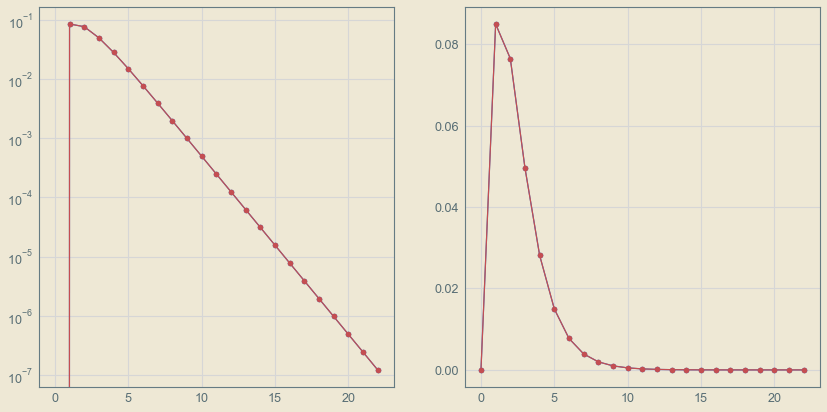

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
ax[0].semilogy([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S2['Xs'])]))], '-ob')
ax[0].semilogy([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S3['Xs'])]))], '-or')
# ax[0].semilogy([nla.norm(S2['Xs'][i] - S3['Xs'][i], 'fro') for i in range(np.min([len(S2['Xs']), len(S3['Xs'])]))], '-og')

ax[1].plot([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S2['Xs'])]))], '-ob')
ax[1].plot([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S3['Xs'])]))], '-or')
# ax[1].plot([nla.norm(S2['Xs'][i] - S3['Xs'][i], 'fro') for i in range(np.min([len(S2['Xs']), len(S3['Xs'])]))], '-og')

# $S$의 spectral radius를 키워보자

In [9]:
delt = .00000
m = 10
A = shf.MakeSingularA(m, 2, delta = delt)

alph = .1
B = A.copy()
A[1] = B[1] - 2*alph*B[2]
A[0] = alph**2 *B[2] - alph*B[1] + B[0]

C:\00_Data\Jupyter\SSH\NonlinearMatrixEquations\SHFunctions.py:291: RuntimeWarning: overflow encountered in matmul
  C1 = C0 @ nla.inv(B0) @ C0
C:\00_Data\Jupyter\SSH\NonlinearMatrixEquations\SHFunctions.py:288: RuntimeWarning: invalid value encountered in matmul
  T0 = T0 - A0 @ nla.inv(B0) @ C0
C:\00_Data\Jupyter\SSH\NonlinearMatrixEquations\SHFunctions.py:290: RuntimeWarning: invalid value encountered in matmul
  B1 = B0 - A0 @ nla.inv(B0) @ C0 - C0 @ nla.inv(B0) @ A0


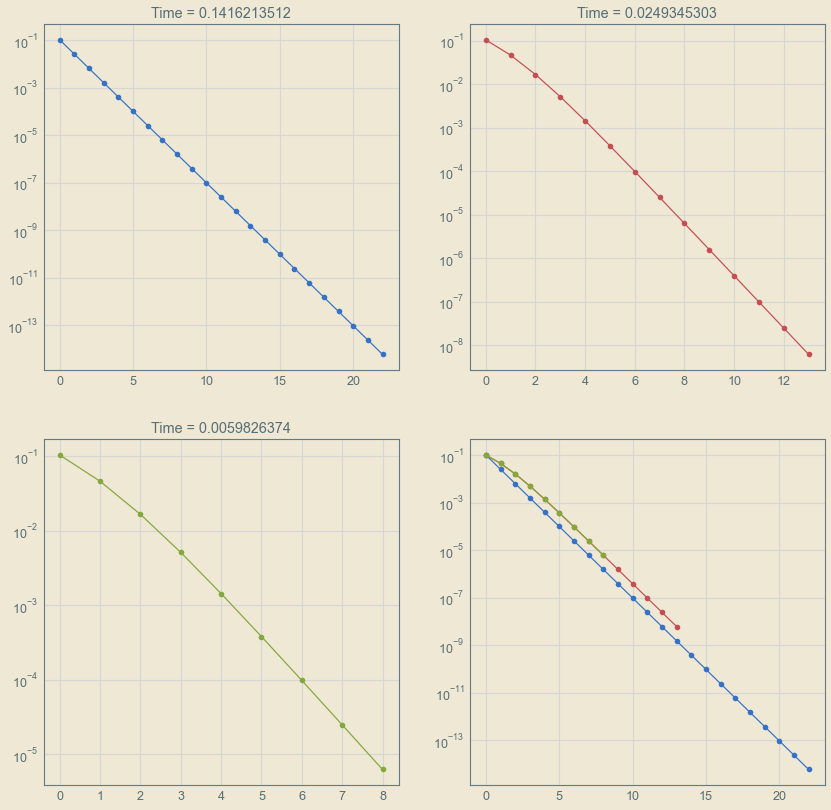

In [10]:
Ss = shf.NewtonPoly(A, X0 = -nla.solve(A[1], A[0]))
S2 = shf.CRPoly(A)
# S3 = shf.BrunoCRPoly(A)
S3 = shf.BrunoCRPoly(A, criteria=1, tol=1e-13)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 14))
ax[0][0].set_title('Time = {:.10f}'.format(Ss['CalTime']))
ax[0][0].semilogy(Ss['errs'], '-ob')

ax[0][1].set_title('Time = {:.10f}'.format(S2['CalTime']))
ax[0][1].semilogy(S2['errs'], '-or')

ax[1][0].set_title('Time = {:.10f}'.format(S3['CalTime']))
ax[1][0].semilogy(S3['errs'], '-og')

ax[1][1].semilogy(Ss['errs'], '-ob')
ax[1][1].semilogy(S2['errs'], '-or')
ax[1][1].semilogy(S3['errs'], '-og')

In [11]:
print('Newton : \n{}\nCR : \n{}\nBrunoCR : \n{}'.format(Ss['sol'], S2['sol'], S3['sol']))

Newton : 
[[0.16071681 0.16648009 0.0532289  0.07912614 0.11093769 0.09288364 0.12628673 0.09367125 0.1361436  0.08052503]
 [0.12578829 0.17988778 0.0594227  0.08657802 0.12977863 0.11211853 0.13661103 0.05600062 0.14801447 0.0657998 ]
 [0.06413132 0.15533278 0.13958378 0.08849581 0.1062062  0.16333703 0.11277877 0.0500722  0.15254476 0.06751722]
 [0.08128301 0.10863397 0.08626818 0.15402333 0.12714072 0.14161859 0.10388394 0.06481095 0.11967103 0.11266614]
 [0.06245931 0.13849501 0.06635158 0.07681296 0.17721262 0.16899444 0.09061158 0.05380073 0.17132782 0.0939338 ]
 [0.12383585 0.1208244  0.03964468 0.05704026 0.09323252 0.18676109 0.15918315 0.10020192 0.10031471 0.11896128]
 [0.09338113 0.09550665 0.0474022  0.10606832 0.10717189 0.15406686 0.18072629 0.06263582 0.14966723 0.10337348]
 [0.08910566 0.11277544 0.05497633 0.06386473 0.11569668 0.13897178 0.13327041 0.14635548 0.10305335 0.14193001]
 [0.07090693 0.10601615 0.07413367 0.07971489 0.12972536 0.13864246 0.12783842 0.10052

In [12]:
print('Solution Difference\nNewton - CR : {}\nNewton - Bruno : {}'.format(nla.norm(Ss['sol'] - S2['sol'], 'fro'), nla.norm(Ss['sol'] - S3['sol'], 'fro')))

Solution Difference
Newton - CR : nan
Newton - Bruno : 0.004402673959088334


In [13]:
print('Errors\nNewton : {}\nCR : {}\nBruno : {}'.format(nla.norm(shf.Pnomial(Ss['sol'], A), 'fro'), nla.norm(shf.Pnomial(S2['sol'], A), 'fro'), nla.norm(shf.Pnomial(S3['sol'], A), 'fro')))

Errors
Newton : 5.887004513642936e-15
CR : nan
Bruno : 6.281569217061583e-06


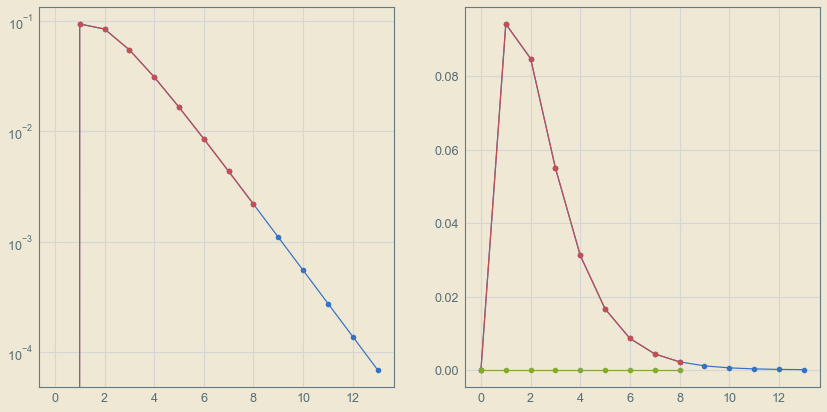

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
ax[0].semilogy([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S2['Xs'])]))], '-ob')
ax[0].semilogy([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S3['Xs'])]))], '-or')
ax[0].semilogy([nla.norm(S2['Xs'][i] - S3['Xs'][i], 'fro') for i in range(np.min([len(S2['Xs']), len(S3['Xs'])]))], '-og')

ax[1].plot([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S2['Xs'])]))], '-ob')
ax[1].plot([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S3['Xs'])]))], '-or')
ax[1].plot([nla.norm(S2['Xs'][i] - S3['Xs'][i], 'fro') for i in range(np.min([len(S2['Xs']), len(S3['Xs'])]))], '-og')

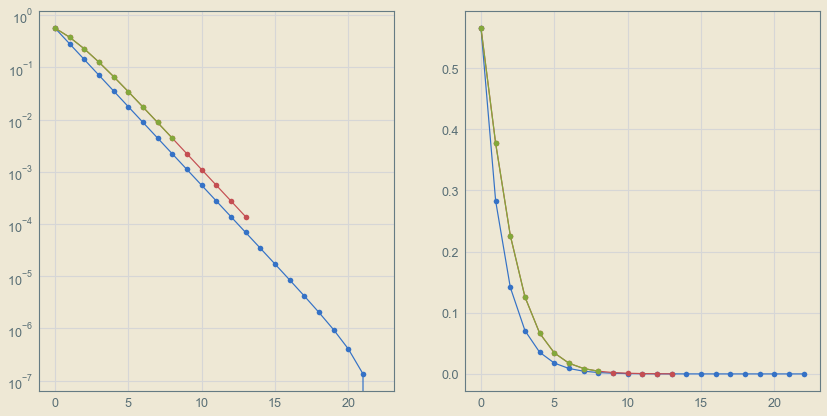

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
ax[0].semilogy([nla.norm(Ss['Xs'][i] - Ss['sol'], 'fro') for i in range(len(Ss['Xs']))], '-ob')
ax[0].semilogy([nla.norm(S2['Xs'][i] - Ss['sol'], 'fro') for i in range(len(S2['Xs']))], '-or')
ax[0].semilogy([nla.norm(S3['Xs'][i] - Ss['sol'], 'fro') for i in range(len(S3['Xs']))], '-og')

ax[1].plot([nla.norm(Ss['Xs'][i] - Ss['sol'], 'fro') for i in range(len(Ss['Xs']))], '-ob')
ax[1].plot([nla.norm(S2['Xs'][i] - Ss['sol'], 'fro') for i in range(len(S2['Xs']))], '-or')
ax[1].plot([nla.norm(S3['Xs'][i] - Ss['sol'], 'fro') for i in range(len(S3['Xs']))], '-og')

In [16]:
np.max(np.abs(nla.eig(np.eye(10) + A[1])[0]))

0.26666666666666666

# Cyclic Reduction이 잘 작동하지 않는 예를 찾은 것 같은데??
## 아래의 $A$'s가 예시일 듯

In [17]:
np.set_printoptions(suppress=True)
A

array([[[ 0.1       ,  0.08548037,  0.01203497,  0.02286073,  0.03085772,  0.00351397,  0.04352177,  0.04465078,  0.04314183,  0.01727118],
        [ 0.06402453,  0.1       ,  0.01807548,  0.03033286,  0.05069036,  0.02158032,  0.05431439,  0.0064657 ,  0.05456798,  0.0032817 ],
        [ 0.00137628,  0.07452603,  0.1       ,  0.03320649,  0.02777819,  0.0712943 ,  0.02852607,  0.00086766,  0.06086038,  0.00489793],
        [ 0.02021239,  0.02844621,  0.04387619,  0.1       ,  0.04777338,  0.04918621,  0.0225457 ,  0.01679925,  0.02687741,  0.04761658],
        [ 0.00027437,  0.05881975,  0.02477597,  0.02223191,  0.1       ,  0.07705036,  0.0070664 ,  0.00378   ,  0.0791726 ,  0.03016197],
        [ 0.0589429 ,  0.04175076,  0.00096845,  0.00095484,  0.01472312,  0.1       ,  0.07501857,  0.05019202,  0.00856274,  0.05221993],
        [ 0.03123095,  0.01714722,  0.00635509,  0.04990007,  0.02817673,  0.06277671,  0.1       ,  0.01214033,  0.05842844,  0.03717779],
        [ 0.02602933

# UQME 상대로도 테스트가 필요
## 그래서 아래를 테스트해 봅시다

In [18]:
delt = .00000
m = 10
A = np.zeros((3, m, m))
A[2] = np.eye(m)
A[0][np.diag_indices(m)] = 15*np.ones(m)
A[0][np.arange(0, 9), np.arange(1, 10)] = -1*np.ones(m-1)
A[0][np.arange(1, 10), np.arange(0, 9)] = -1*np.ones(m-1)
A[1][np.diag_indices(m)] = 30*np.ones(m)
A[1][np.arange(0, 9), np.arange(1, 10)] = -10*np.ones(m-1)
A[1][np.arange(1, 10), np.arange(0, 9)] = -10*np.ones(m-1)
# A[1, 0, 0], A[1, m-1, m-1] = 20, 20

In [19]:
nla.solve(A[1], A[0]) >= -np.finfo(float).eps

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True]])

C:\00_Data\Jupyter\SSH\NonlinearMatrixEquations\SHFunctions.py:318: RuntimeWarning: invalid value encountered in double_scalars
  c2 = np.dot(x2,y2) / (nla.norm(x2,2)*nla.norm(y2,2))


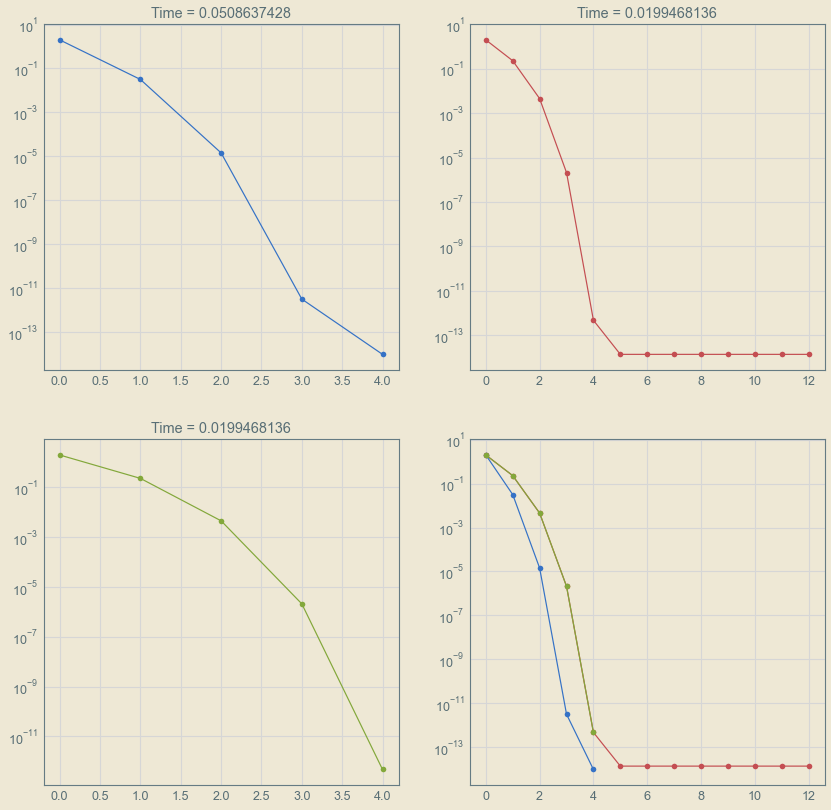

In [20]:
Ss = shf.NewtonPoly(A, X0 = -nla.solve(A[1], A[0]))
S2 = shf.CRPoly(A)
# S3 = shf.BrunoCRPoly(A)
S3 = shf.BrunoCRPoly(A, criteria=1, tol=1e-13)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 14))
ax[0][0].set_title('Time = {:.10f}'.format(Ss['CalTime']))
ax[0][0].semilogy(Ss['errs'], '-ob')

ax[0][1].set_title('Time = {:.10f}'.format(S2['CalTime']))
ax[0][1].semilogy(S2['errs'], '-or')

ax[1][0].set_title('Time = {:.10f}'.format(S2['CalTime']))
ax[1][0].semilogy(S3['errs'], '-og')

ax[1][1].semilogy(Ss['errs'], '-ob')
ax[1][1].semilogy(S2['errs'], '-or')
ax[1][1].semilogy(S3['errs'], '-og')

In [21]:
print('Newton : \n{}\nCR : \n{}\nBrunoCR : \n{}'.format(Ss['sol'], S2['sol'], S3['sol']))

Newton : 
[[-0.57789883 -0.19563316 -0.08243154 -0.03574062 -0.01592767 -0.00728026 -0.00339984 -0.00160692 -0.00074492 -0.00029401]
 [-0.19563316 -0.66033036 -0.23137377 -0.09835921 -0.04302088 -0.01932751 -0.00888718 -0.00414476 -0.00190093 -0.00074492]
 [-0.08243154 -0.23137377 -0.67625804 -0.23865404 -0.10175905 -0.0446278  -0.02007244 -0.0091812  -0.00414476 -0.00160692]
 [-0.03574062 -0.09835921 -0.23865404 -0.67965787 -0.24026096 -0.10250397 -0.04492181 -0.02007244 -0.00888718 -0.00339984]
 [-0.01592767 -0.04302088 -0.10175905 -0.24026096 -0.6804028  -0.24055497 -0.10250397 -0.0446278  -0.01932751 -0.00728026]
 [-0.00728026 -0.01932751 -0.0446278  -0.10250397 -0.24055497 -0.6804028  -0.24026096 -0.10175905 -0.04302088 -0.01592767]
 [-0.00339984 -0.00888718 -0.02007244 -0.04492181 -0.10250397 -0.24026096 -0.67965787 -0.23865404 -0.09835921 -0.03574062]
 [-0.00160692 -0.00414476 -0.0091812  -0.02007244 -0.0446278  -0.10175905 -0.23865404 -0.67625804 -0.23137377 -0.08243154]
 [-0.0

In [22]:
print('Solution Difference\nNewton - CR : {}\nNewton - Bruno : {}'.format(nla.norm(Ss['sol'] - S2['sol'], 'fro'), nla.norm(Ss['sol'] - S3['sol'], 'fro')))

Solution Difference
Newton - CR : nan
Newton - Bruno : 5.888655916092484e-14


In [23]:
print('Errors\nNewton : {}\nCR : {}\nBruno : {}'.format(nla.norm(shf.Pnomial(Ss['sol'], A), 'fro'), nla.norm(shf.Pnomial(S2['sol'], A), 'fro'), nla.norm(shf.Pnomial(S3['sol'], A), 'fro')))

Errors
Newton : 9.73382931378471e-15
CR : nan
Bruno : 4.731784602847421e-13


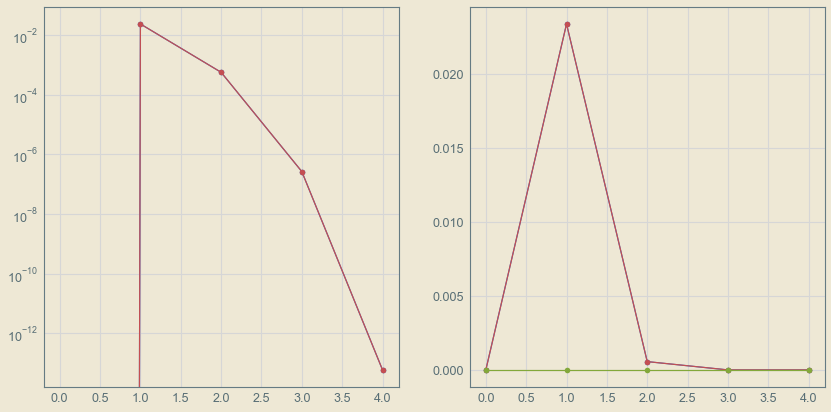

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
ax[0].semilogy([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S2['Xs'])]))], '-ob')
ax[0].semilogy([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S3['Xs'])]))], '-or')
ax[0].semilogy([nla.norm(S2['Xs'][i] - S3['Xs'][i], 'fro') for i in range(np.min([len(S2['Xs']), len(S3['Xs'])]))], '-og')

ax[1].plot([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S2['Xs'])]))], '-ob')
ax[1].plot([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S3['Xs'])]))], '-or')
ax[1].plot([nla.norm(S2['Xs'][i] - S3['Xs'][i], 'fro') for i in range(np.min([len(S2['Xs']), len(S3['Xs'])]))], '-og')

In [25]:
np.max(np.abs(nla.eig(Ss['sol'])[0]))

1.3883837557442884

## 추가 solution 평행이동

In [26]:
delt = .00000
m = 10
A = np.zeros((3, m, m))
A[2] = np.eye(m)
A[0][np.diag_indices(m)] = 15*np.ones(m)
A[0][np.arange(0, 9), np.arange(1, 10)] = -1*np.ones(m-1)
A[0][np.arange(1, 10), np.arange(0, 9)] = -1*np.ones(m-1)
A[1][np.diag_indices(m)] = 30*np.ones(m)
A[1][np.arange(0, 9), np.arange(1, 10)] = -10*np.ones(m-1)
A[1][np.arange(1, 10), np.arange(0, 9)] = -10*np.ones(m-1)
# A[1, 0, 0], A[1, m-1, m-1] = 20, 20

alph = -2.
B = A.copy()
A[1] = B[1] - 2*alph*B[2]
A[0] = alph**2 *B[2] - alph*B[1] + B[0]

In [27]:
nla.solve(A[1], A[0]) >= -np.finfo(float).eps

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,  True]])

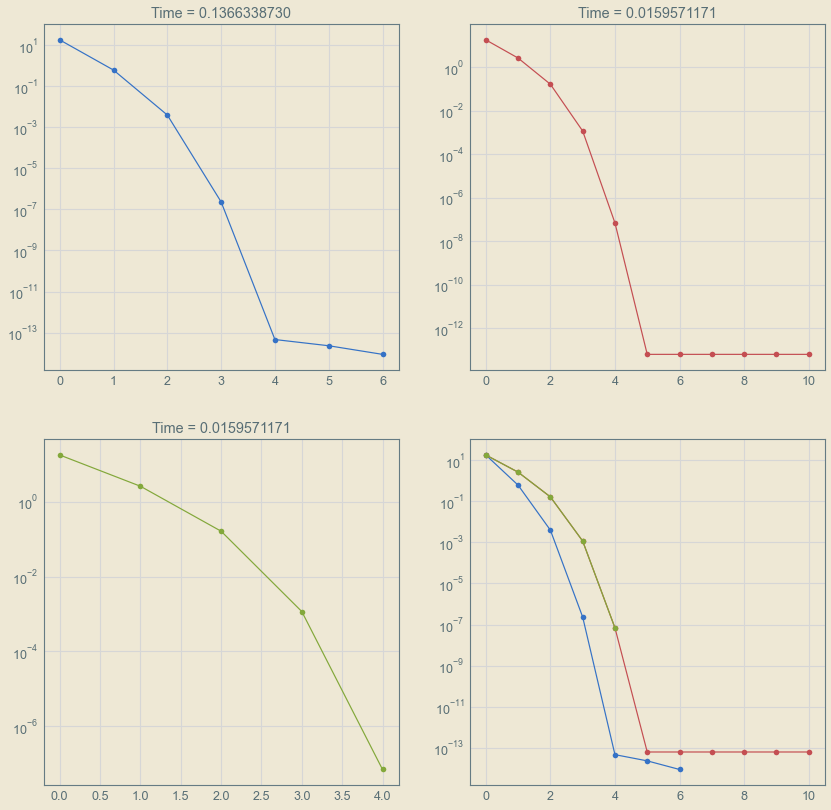

In [28]:
Ss = shf.NewtonPoly(A, X0 = -nla.solve(A[1], A[0]))
S2 = shf.CRPoly(A)
# S3 = shf.BrunoCRPoly(A)
S3 = shf.BrunoCRPoly(A, criteria=1, tol=1e-13)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 14))
ax[0][0].set_title('Time = {:.10f}'.format(Ss['CalTime']))
ax[0][0].semilogy(Ss['errs'], '-ob')

ax[0][1].set_title('Time = {:.10f}'.format(S2['CalTime']))
ax[0][1].semilogy(S2['errs'], '-or')

ax[1][0].set_title('Time = {:.10f}'.format(S2['CalTime']))
ax[1][0].semilogy(S3['errs'], '-og')

ax[1][1].semilogy(Ss['errs'], '-ob')
ax[1][1].semilogy(S2['errs'], '-or')
ax[1][1].semilogy(S3['errs'], '-og')

In [29]:
print('Newton : \n{}\nCR : \n{}\nBrunoCR : \n{}'.format(Ss['sol'], S2['sol'], S3['sol']))

Newton : 
[[-2.57789883 -0.19563316 -0.08243154 -0.03574062 -0.01592767 -0.00728026 -0.00339984 -0.00160692 -0.00074492 -0.00029401]
 [-0.19563316 -2.66033036 -0.23137377 -0.09835921 -0.04302088 -0.01932751 -0.00888718 -0.00414476 -0.00190093 -0.00074492]
 [-0.08243154 -0.23137377 -2.67625804 -0.23865404 -0.10175905 -0.0446278  -0.02007244 -0.0091812  -0.00414476 -0.00160692]
 [-0.03574062 -0.09835921 -0.23865404 -2.67965787 -0.24026096 -0.10250397 -0.04492181 -0.02007244 -0.00888718 -0.00339984]
 [-0.01592767 -0.04302088 -0.10175905 -0.24026096 -2.6804028  -0.24055497 -0.10250397 -0.0446278  -0.01932751 -0.00728026]
 [-0.00728026 -0.01932751 -0.0446278  -0.10250397 -0.24055497 -2.6804028  -0.24026096 -0.10175905 -0.04302088 -0.01592767]
 [-0.00339984 -0.00888718 -0.02007244 -0.04492181 -0.10250397 -0.24026096 -2.67965787 -0.23865404 -0.09835921 -0.03574062]
 [-0.00160692 -0.00414476 -0.0091812  -0.02007244 -0.0446278  -0.10175905 -0.23865404 -2.67625804 -0.23137377 -0.08243154]
 [-0.0

In [30]:
print('Solution Difference\nNewton - CR : {}\nNewton - Bruno : {}'.format(nla.norm(Ss['sol'] - S2['sol'], 'fro'), nla.norm(Ss['sol'] - S3['sol'], 'fro')))

Solution Difference
Newton - CR : nan
Newton - Bruno : 8.576881624367033e-09


In [31]:
print('Errors\nNewton : {}\nCR : {}\nBruno : {}'.format(nla.norm(shf.Pnomial(Ss['sol'], A), 'fro'), nla.norm(shf.Pnomial(S2['sol'], A), 'fro'), nla.norm(shf.Pnomial(S3['sol'], A), 'fro')))

Errors
Newton : 8.777851260813991e-15
CR : nan
Bruno : 6.890360931917112e-08


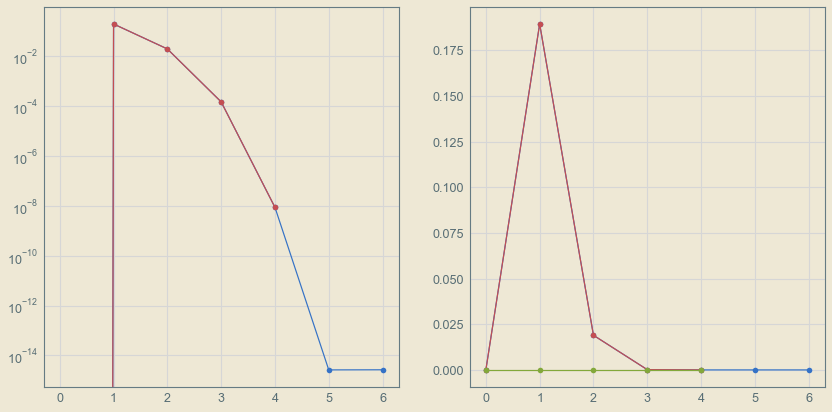

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
ax[0].semilogy([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S2['Xs'])]))], '-ob')
ax[0].semilogy([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S3['Xs'])]))], '-or')
ax[0].semilogy([nla.norm(S2['Xs'][i] - S3['Xs'][i], 'fro') for i in range(np.min([len(S2['Xs']), len(S3['Xs'])]))], '-og')

ax[1].plot([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S2['Xs'])]))], '-ob')
ax[1].plot([nla.norm(Ss['Xs'][i] - S2['Xs'][i], 'fro') for i in range(np.min([len(Ss['Xs']), len(S3['Xs'])]))], '-or')
ax[1].plot([nla.norm(S2['Xs'][i] - S3['Xs'][i], 'fro') for i in range(np.min([len(S2['Xs']), len(S3['Xs'])]))], '-og')

In [33]:
np.max(np.abs(nla.eig(Ss['sol'])[0]))

3.38838375574429

# $B^{-1}C \geq 0$가 성립하는 parameter 어떻게 찾을지 알아봐야겠는데....

In [34]:
divi = 1001

m = 4
B, C = np.zeros((m, m)), np.zeros((m, m))
C[np.diag_indices(m)] = 15*np.ones(m)
C[np.arange(0, m-1), np.arange(1, m)] = -1*np.ones(m-1)
C[np.arange(1, m), np.arange(0, m-1)] = -1*np.ones(m-1)
B[np.diag_indices(m)] = 30*np.ones(m)
B[np.arange(0, m-1), np.arange(1, m)] = -10*np.ones(m-1)
B[np.arange(1, m), np.arange(0, m-1)] = -10*np.ones(m-1)
# B[0, 0], B[m-1, m-1] = 20, 20

alph = -.01
BB, CC = B, C
B = BB - 2*alph*np.eye(m)
C = alph**2 *np.eye(m) - alph*BB + CC

In [35]:
B, C

(array([[ 30.02, -10.  ,   0.  ,   0.  ],
        [-10.  ,  30.02, -10.  ,   0.  ],
        [  0.  , -10.  ,  30.02, -10.  ],
        [  0.  ,   0.  , -10.  ,  30.02]]),
 array([[15.3001, -1.1   ,  0.    ,  0.    ],
        [-1.1   , 15.3001, -1.1   ,  0.    ],
        [ 0.    , -1.1   , 15.3001, -1.1   ],
        [ 0.    ,  0.    , -1.1   , 15.3001]]))

In [36]:
tb = 30.02
tc = 15.3001
tc*(tb*np.eye(m) - B) - tb*(tc*np.eye(m) - C)

array([[  0.   , 119.979,   0.   ,   0.   ],
       [119.979,   0.   , 119.979,   0.   ],
       [  0.   , 119.979,   0.   , 119.979],
       [  0.   ,   0.   , 119.979,   0.   ]])

In [37]:
nla.solve(B, C)

array([[0.56769354, 0.17420599, 0.06527286, 0.02174312],
       [0.17420599, 0.63296639, 0.19594912, 0.06527286],
       [0.06527286, 0.19594912, 0.63296639, 0.17420599],
       [0.02174312, 0.06527286, 0.17420599, 0.56769354]])

In [38]:
b = np.linspace(20, 40, divi)
c = np.linspace(5, 25, divi)
bb, cc = np.meshgrid(b, c)

In [39]:
BC = np.zeros((divi, divi, m, m))
for i in range(divi):
    for j in range(divi):
        BC[i,j] = c[j]*(b[i]*np.eye(m) - B) - b[i]*(c[j]*np.eye(m) - C)

In [40]:
BC.min(axis=(2, 3))

array([[   0.      ,    0.      ,    0.      , ..., -443.2972  , -443.8976  , -444.498   ],
       [   0.      ,    0.      ,    0.      , ..., -442.991198, -443.591598, -444.191998],
       [   0.      ,    0.      ,    0.      , ..., -442.685196, -443.285596, -443.885996],
       ...,
       [   0.      ,    0.      ,    0.      , ..., -137.907204, -138.507604, -139.108004],
       [   0.      ,    0.      ,    0.      , ..., -137.601202, -138.201602, -138.802002],
       [   0.      ,    0.      ,    0.      , ..., -137.2952  , -137.8956  , -138.496   ]])

In [41]:
b.min(), b.max(), c.min(), c.max()

(20.0, 40.0, 5.0, 25.0)

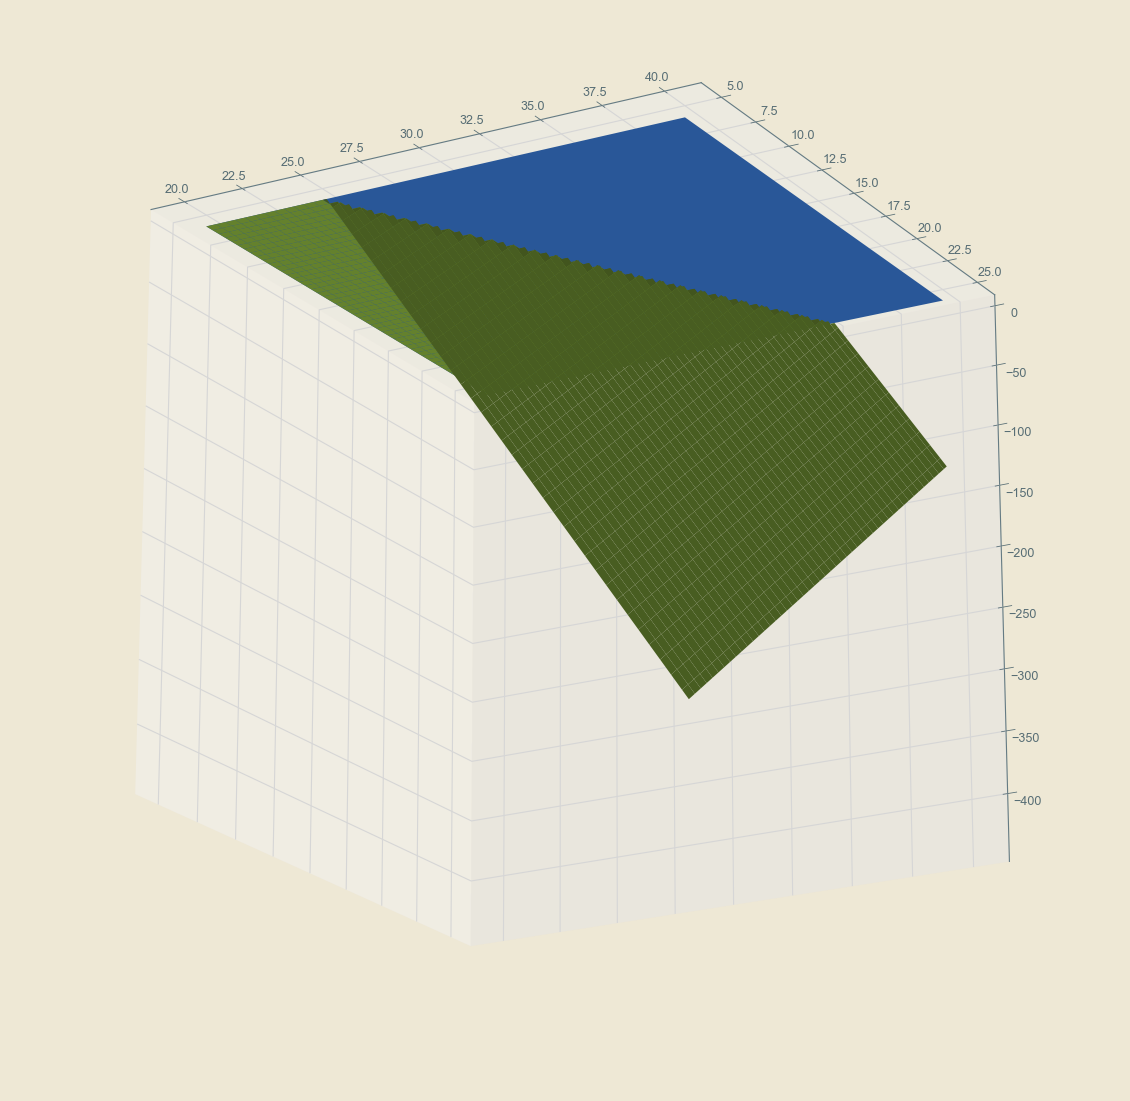

In [42]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 20), subplot_kw = {'projection':'3d'})
ax.plot_surface(np.array([[b.min(), b.max()], [b.min(), b.max()]]), 
                np.array([[c.min(), c.min()], [c.max(), c.max()]]), 
                np.zeros((2, 2)))
ax.plot_surface(bb, cc, BC.min((2, 3)))#, levels=np.arange(-200, 200, 20))
ax.view_init(elev = -20)

In [43]:
t = np.where(BC.min((2, 3)) > -1e-1)

(20.0, 40.0, 5.0, 25.0)

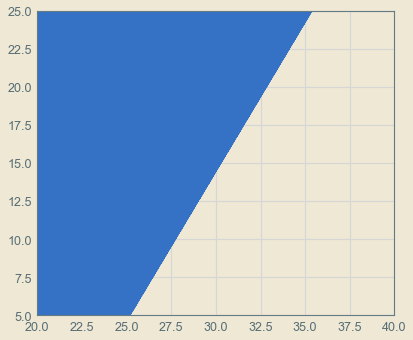

In [44]:
plt.plot(bb[t], cc[t], '-')
plt.axis([b.min(), b.max(), c.min(), c.max()])

# 이번엔 알파 변환에 따른 $B^{-1}C$의 최소값 보기

In [45]:
m = 10
B, C = np.zeros((m, m)), np.zeros((m, m))
C[np.diag_indices(m)] = 15*np.ones(m)
C[np.arange(0, m-1), np.arange(1, m)] = -1*np.ones(m-1)
C[np.arange(1, m), np.arange(0, m-1)] = -1*np.ones(m-1)
B[np.diag_indices(m)] = 30*np.ones(m)
B[np.arange(0, m-1), np.arange(1, m)] = -10*np.ones(m-1)
B[np.arange(1, m), np.arange(0, m-1)] = -10*np.ones(m-1)
# B[0, 0], B[m-1, m-1] = 20, 20

In [46]:
divi = 10001
alph = np.linspace(-5, 5, divi)
alph = np.stack([alph]*m, axis = -1)
alph = np.stack([alph]*m, axis = -1)

BB, CC = np.stack([B]*divi), np.stack([C]*divi)

eyem = np.stack([np.eye(m)]*divi)

B = BB - 2*alph*eyem
C = alph**2 *eyem - alph*BB + CC

In [47]:
BC = nla.inv(B) @ C

In [48]:
BC.min(axis=(1, 2)).shape

(10001,)

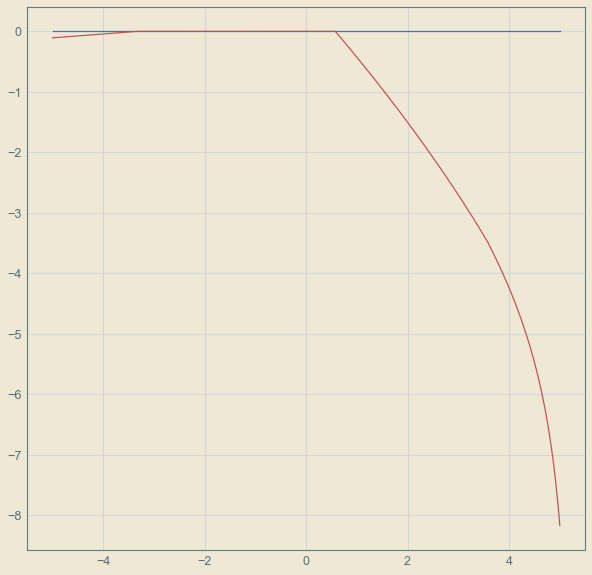

In [49]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 10))
ax.plot([alph.min(), alph.max()], [0, 0], 'b')
ax.plot(alph.min((1, 2)), BC.min((1, 2)), 'r')

In [50]:
t = np.where(BC.min((1, 2)) > -1e-10)

(-5.0, 5.0)

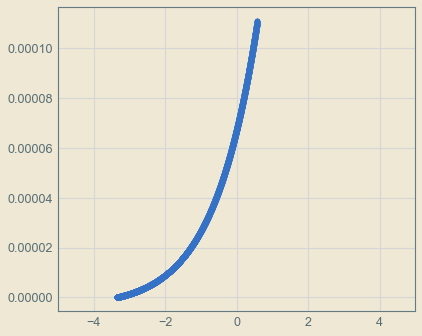

In [51]:
plt.plot(alph.min((1, 2))[t], BC.min((1, 2))[t], '-ob')
plt.xlim([alph.min(), alph.max()])

(-5.0, 5.0, 1.786146167275934e-09, 0.00011112112697973038)

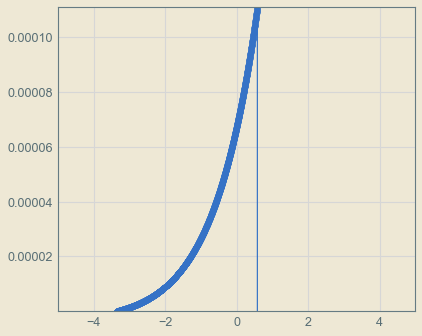

In [52]:
plt.plot(alph.min((1, 2)), BC.min((1, 2)), '-ob')
plt.axis([alph.min(), alph.max(), BC.min((1, 2))[t].min(), BC.min((1, 2))[t].max()])

(-5.0, 5.0, -0.00011112112697973038, 0.00011112112697973038)

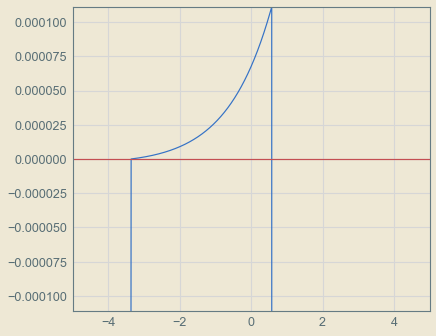

In [53]:
plt.plot(alph.min((1, 2)), BC.min((1, 2)), '-b')
plt.plot([alph.min(), alph.max()], [0, 0], '-r')
plt.axis([alph.min(), alph.max(), -1*BC.min((1, 2))[t].max(), BC.min((1, 2))[t].max()])